In [3]:
from __future__ import division, print_function
import pandas as pd
import numpy as np
import scipy.signal as sg

import plotly as py
import plotly.graph_objs as go
import scipy.integrate as si
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import norm 
from plotly import tools
from sklearn.preprocessing import normalize

In [4]:
py.offline.init_notebook_mode(connected=True)
from ipywidgets import widgets

In [7]:
res_levels = pd.read_csv('chennai_reservoir_levels.csv')
rainfall = pd.read_csv('chennai_reservoir_rainfall.csv')
res_levels.tail()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
5831,19-12-2019,1535.0,139.0,2318.0,1397.0
5832,20-12-2019,1529.0,131.0,2335.0,1435.0
5833,21-12-2019,1522.0,123.0,2351.0,1473.0
5834,22-12-2019,1514.0,115.0,2369.0,1510.0
5835,23-12-2019,1497.0,108.0,2382.0,1548.0


In [8]:
layout = go.Layout(title = 'Reservoir levels',xaxis = dict(title='Time'), yaxis = dict(title='Total Amount Water in mcft'))

In [9]:
data=[]

for i in ['POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM']:
    trace = go.Scatter(
        x = res_levels.Date,
        y = res_levels.loc[:,i],
        name = i,
        mode = 'lines'
    )
    data.append(trace)

fig = go.Figure(data = data, layout = layout)
py.offline.iplot(fig)
layout = go.Layout(title = 'Total Reservoir levels in all combined',xaxis = dict(title='Time'), yaxis = dict(title='Total Amount Water in mcft'))

In [12]:
data=[]
trace = go.Scatter(x = res_levels.Date, mode = 'lines')
data.append(trace)
fig = go.Figure(data = data, layout = layout)
py.offline.iplot(fig)
layout = go.Layout(title = 'Rainfall data wrt each Reservoir',xaxis = dict(title='Time'), yaxis = dict(title='Total Amount of Rainfall'))

In [14]:
data=[]

for i in ['POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM']:
    trace = go.Scatter(
        x = rainfall.index,
        y = rainfall.loc[:,i],
        name = i,
        mode = 'lines'
    )
    data.append(trace)

fig = go.Figure(data = data, layout = layout)
py.offline.iplot(fig)

# 2. %INTERACTIVE PLOT

In [24]:
year = []
origin = widgets.Dropdown(
    options=list(res_levels.columns[1:5]),
    value='POONDI',
    description='Chennai Dam being Observed: ',)
for i in range(len(res_levels)):
    a = res_levels.loc[i,'Date']
    y = a[6:10]
    year.append(y)
res_levels['Year'] = year
filter_list = [i for i in res_levels['Year'] == '2004']
temp_df = res_levels[filter_list]
startdf = temp_df[origin.value]

year = widgets.IntSlider(
    value=1.0,
    min='2004',
    max='2019',
    step=1.0,
    description='Year: ',
    continuous_update=False)

container = widgets.HBox(children=[year])


In [25]:
# Assign an empty figure widget with two traces
trace1 = go.Scatter(x=res_levels.loc[:,'Date'], y=startdf, name='Water Levels')
g = go.FigureWidget(data=[trace1],
                    layout=go.Layout(
                        title=dict(
                            text='Chennai Reservoir Levels')))


def validate():
    if origin.value in res_levels.columns:
        return True
    else:
        return False

def response(change):
    if validate():

        filter_list = [i for i in res_levels['Year'] == str(year.value)]
        temp_df = res_levels[filter_list]

        x1 = temp_df[origin.value]
        with g.batch_update():
            g.data[0].y = x1
            g.layout.xaxis.title = 'Time'
            g.layout.yaxis.title = 'Water Level'

origin.observe(response, names="value")
year.observe(response, names="value")

container2 = widgets.HBox([origin])
widgets.VBox([container, container2, g])

# 3.  Comparitive Analysis across Reservoirs


In [58]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

reservoir_levels = pd.read_csv('chennai_reservoir_levels.csv')
reservoir_rainfalls = pd.read_csv('chennai_reservoir_rainfall.csv')

chennai_population =  pd.read_csv('chennai_population.csv')
print(chennai_population.head())

reservoir_levels['Date'] = pd.to_datetime(reservoir_levels['Date'],format="%d-%m-%Y",dayfirst=True)

reservoir_levels['year'], reservoir_levels['month'] = reservoir_levels['Date'].dt.year, reservoir_levels['Date'].dt.month

   Year  Population  GrowthRate  Growth
0  1950     1491293    0.000000       0
1  1955     1705272    0.027179  213979
2  1960     1914797    0.023448  209525
3  1965     2394412    0.045720  479615
4  1970     3044204    0.049192  649792


In [27]:
#Segmenting the dataset by year

#Creating the df for each year
reservoir_levels_2004 = reservoir_levels[reservoir_levels.year==2004]
reservoir_levels_2005 = reservoir_levels[reservoir_levels.year==2005]
reservoir_levels_2006 = reservoir_levels[reservoir_levels.year==2006]
reservoir_levels_2007 = reservoir_levels[reservoir_levels.year==2007]
reservoir_levels_2008 = reservoir_levels[reservoir_levels.year==2008]
reservoir_levels_2009 = reservoir_levels[reservoir_levels.year==2009]
reservoir_levels_2010 = reservoir_levels[reservoir_levels.year==2010]
reservoir_levels_2011 = reservoir_levels[reservoir_levels.year==2011]
reservoir_levels_2012 = reservoir_levels[reservoir_levels.year==2012]
reservoir_levels_2013 = reservoir_levels[reservoir_levels.year==2013]
reservoir_levels_2014 = reservoir_levels[reservoir_levels.year==2014]
reservoir_levels_2015 = reservoir_levels[reservoir_levels.year==2015]
reservoir_levels_2016 = reservoir_levels[reservoir_levels.year==2016]
reservoir_levels_2017 = reservoir_levels[reservoir_levels.year==2017]
reservoir_levels_2018 = reservoir_levels[reservoir_levels.year==2018]
reservoir_levels_2019 = reservoir_levels[reservoir_levels.year==2019]


In [28]:
#Dividing Rainfall by years as well
reservoir_rainfalls['Date'] = pd.to_datetime(reservoir_rainfalls['Date'],format="%d-%m-%Y",dayfirst=True)
reservoir_rainfalls['year'], reservoir_rainfalls['month'] = reservoir_rainfalls['Date'].dt.year, reservoir_rainfalls['Date'].dt.month


In [29]:
# Creating the df for each year
reservoir_rainfalls_2004 = reservoir_rainfalls[reservoir_rainfalls.year==2004]
reservoir_rainfalls_2005 = reservoir_rainfalls[reservoir_rainfalls.year==2005]
reservoir_rainfalls_2006 = reservoir_rainfalls[reservoir_rainfalls.year==2006]
reservoir_rainfalls_2007 = reservoir_rainfalls[reservoir_rainfalls.year==2007]
reservoir_rainfalls_2008 = reservoir_rainfalls[reservoir_rainfalls.year==2008]
reservoir_rainfalls_2009 = reservoir_rainfalls[reservoir_rainfalls.year==2009]
reservoir_rainfalls_2010 = reservoir_rainfalls[reservoir_rainfalls.year==2010]
reservoir_rainfalls_2011 = reservoir_rainfalls[reservoir_rainfalls.year==2011]
reservoir_rainfalls_2012 = reservoir_rainfalls[reservoir_rainfalls.year==2012]
reservoir_rainfalls_2013 = reservoir_rainfalls[reservoir_rainfalls.year==2013]
reservoir_rainfalls_2014 = reservoir_rainfalls[reservoir_rainfalls.year==2014]
reservoir_rainfalls_2015 = reservoir_rainfalls[reservoir_rainfalls.year==2015]
reservoir_rainfalls_2016 = reservoir_rainfalls[reservoir_rainfalls.year==2016]
reservoir_rainfalls_2017 = reservoir_rainfalls[reservoir_rainfalls.year==2017]
reservoir_rainfalls_2018 = reservoir_rainfalls[reservoir_rainfalls.year==2018]
reservoir_rainfalls_2019 = reservoir_rainfalls[reservoir_rainfalls.year==2019]


## MATPLOTLIB PLOTS FOR EASY COMPARISON (inferences with results)


Text(0.5, 1.0, "Comparision of 'POONDI' reservoir's levels VS rainfall")

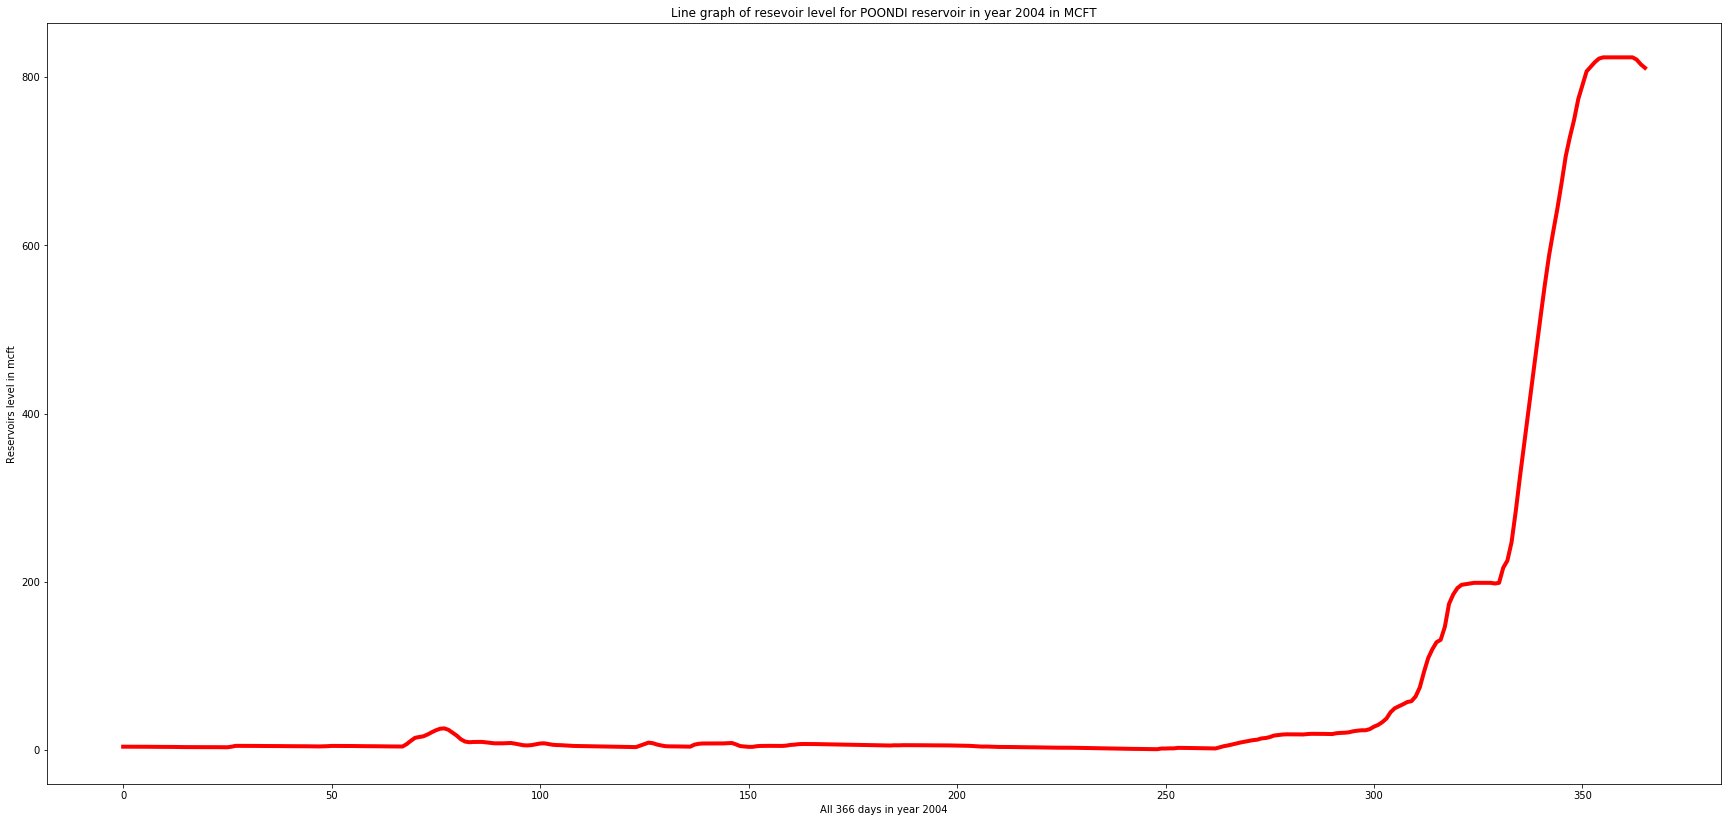

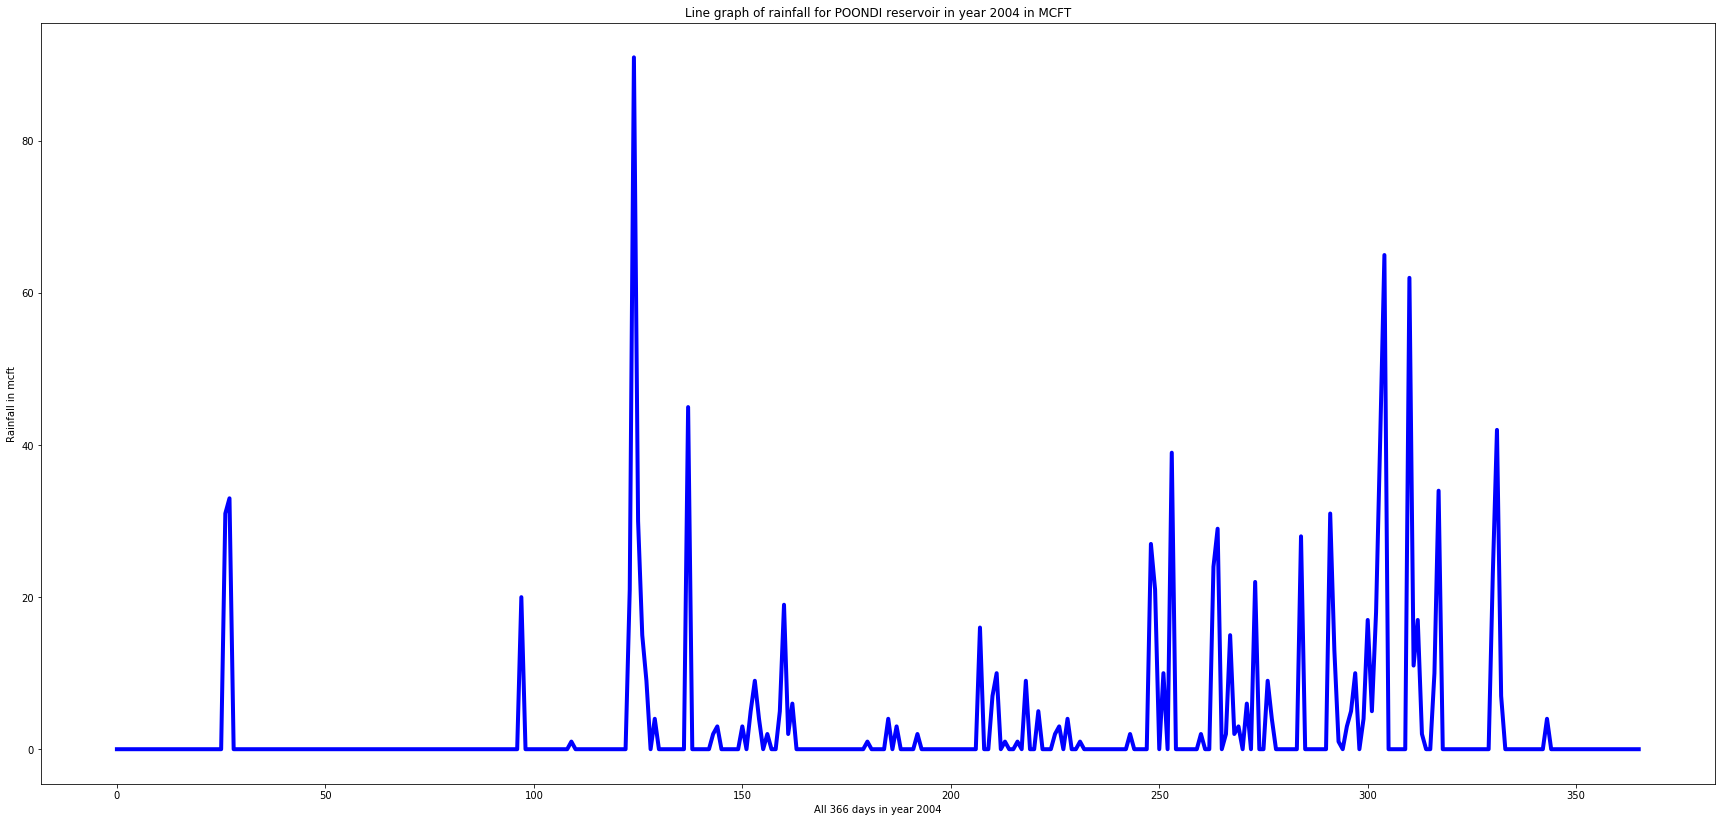

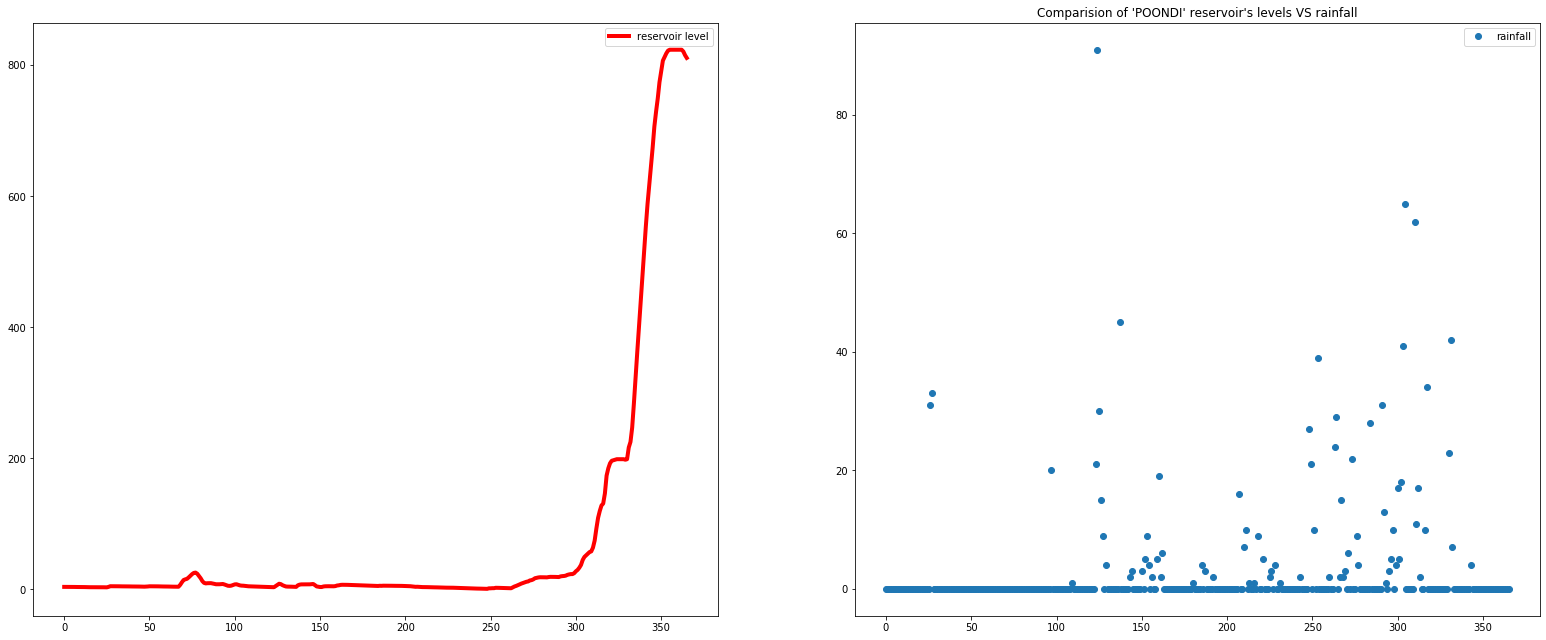

In [30]:
# plotting for 'POONDI' reservoir for year 2004
plt.figure(figsize=(30,14))
plt.plot(reservoir_levels_2004['POONDI'],'r',linewidth = 4)
plt.xlabel("All 366 days in year 2004")
plt.ylabel("Reservoirs level in mcft")
plt.title("Line graph of resevoir level for POONDI reservoir in year 2004 in MCFT")
plt.figure(figsize=(30,14))
plt.plot(reservoir_rainfalls_2004['POONDI'],'b',linewidth = 4)
plt.xlabel("All 366 days in year 2004")
plt.ylabel("Rainfall in mcft")
plt.title("Line graph of rainfall for POONDI reservoir in year 2004 in MCFT")
plt.figure(figsize=(27,24))
plt.subplot(221)
plt.plot(reservoir_levels_2004['POONDI'],'r', label = "reservoir level",linewidth = 4)
plt.legend()
plt.subplot(222)
plt.plot(reservoir_rainfalls_2004['POONDI'],'o',label = "rainfall",linewidth = 4)
plt.legend()
plt.title("Comparision of 'POONDI' reservoir's levels VS rainfall")

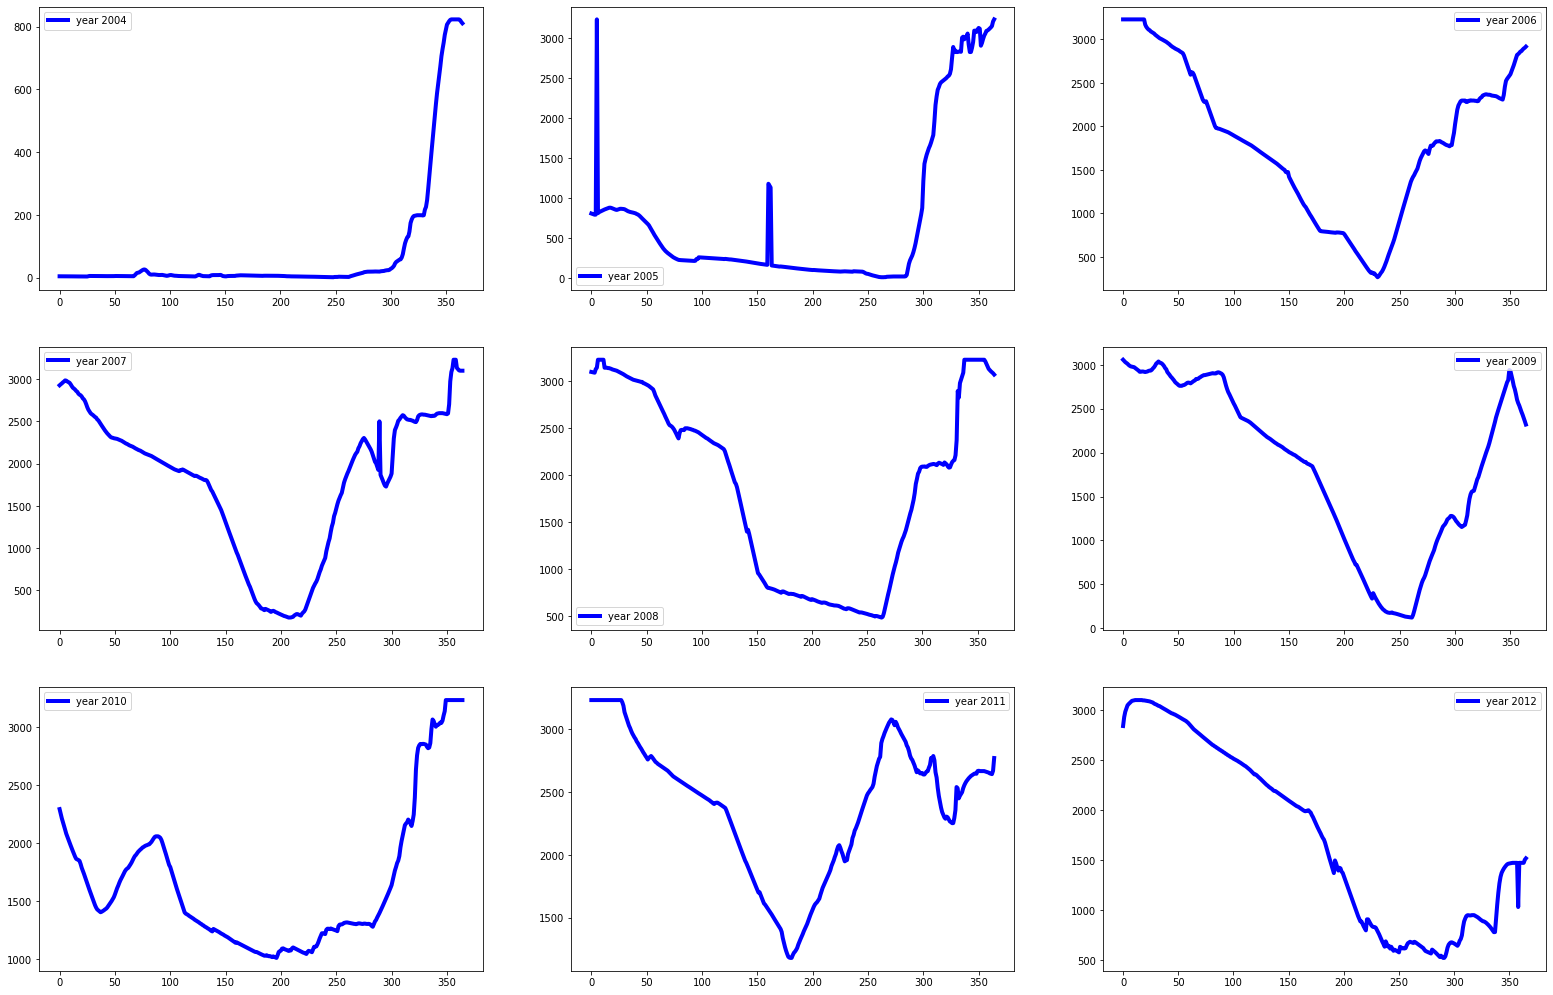

In [31]:
# POONDI 2004 - 2012
plt.figure(figsize=(27,24))
plt.subplot(431)
plt.plot(list(range(reservoir_levels_2004.shape[0])),reservoir_levels_2004['POONDI'],'b',label = "year 2004",linewidth = 4)
plt.legend()
plt.subplot(432)
plt.plot(list(range(reservoir_levels_2005.shape[0])),reservoir_levels_2005['POONDI'],'b',label = "year 2005",linewidth = 4)
plt.legend()
plt.subplot(433)
plt.plot(list(range(reservoir_levels_2006.shape[0])),reservoir_levels_2006['POONDI'],'b',label = "year 2006",linewidth = 4)
plt.legend()
plt.subplot(434)
plt.plot(list(range(reservoir_levels_2007.shape[0])),reservoir_levels_2007['POONDI'],'b',label = "year 2007",linewidth = 4)
plt.legend()
plt.subplot(435)
plt.plot(list(range(reservoir_levels_2008.shape[0])),reservoir_levels_2008['POONDI'],'b',label = "year 2008",linewidth = 4)
plt.legend()
plt.subplot(436)
plt.plot(list(range(reservoir_levels_2009.shape[0])),reservoir_levels_2009['POONDI'],'b',label = "year 2009",linewidth = 4)
plt.legend()
plt.subplot(437)
plt.plot(list(range(reservoir_levels_2010.shape[0])),reservoir_levels_2010['POONDI'],'b',label = "year 2010",linewidth = 4)
plt.legend()

plt.subplot(438)
plt.plot(list(range(reservoir_levels_2011.shape[0])),reservoir_levels_2011['POONDI'],'b',label = "year 2011",linewidth = 4)
plt.legend()
plt.subplot(439)
plt.plot(list(range(reservoir_levels_2012.shape[0])),reservoir_levels_2012['POONDI'],'b',label = "year 2012",linewidth = 4)
plt.legend()

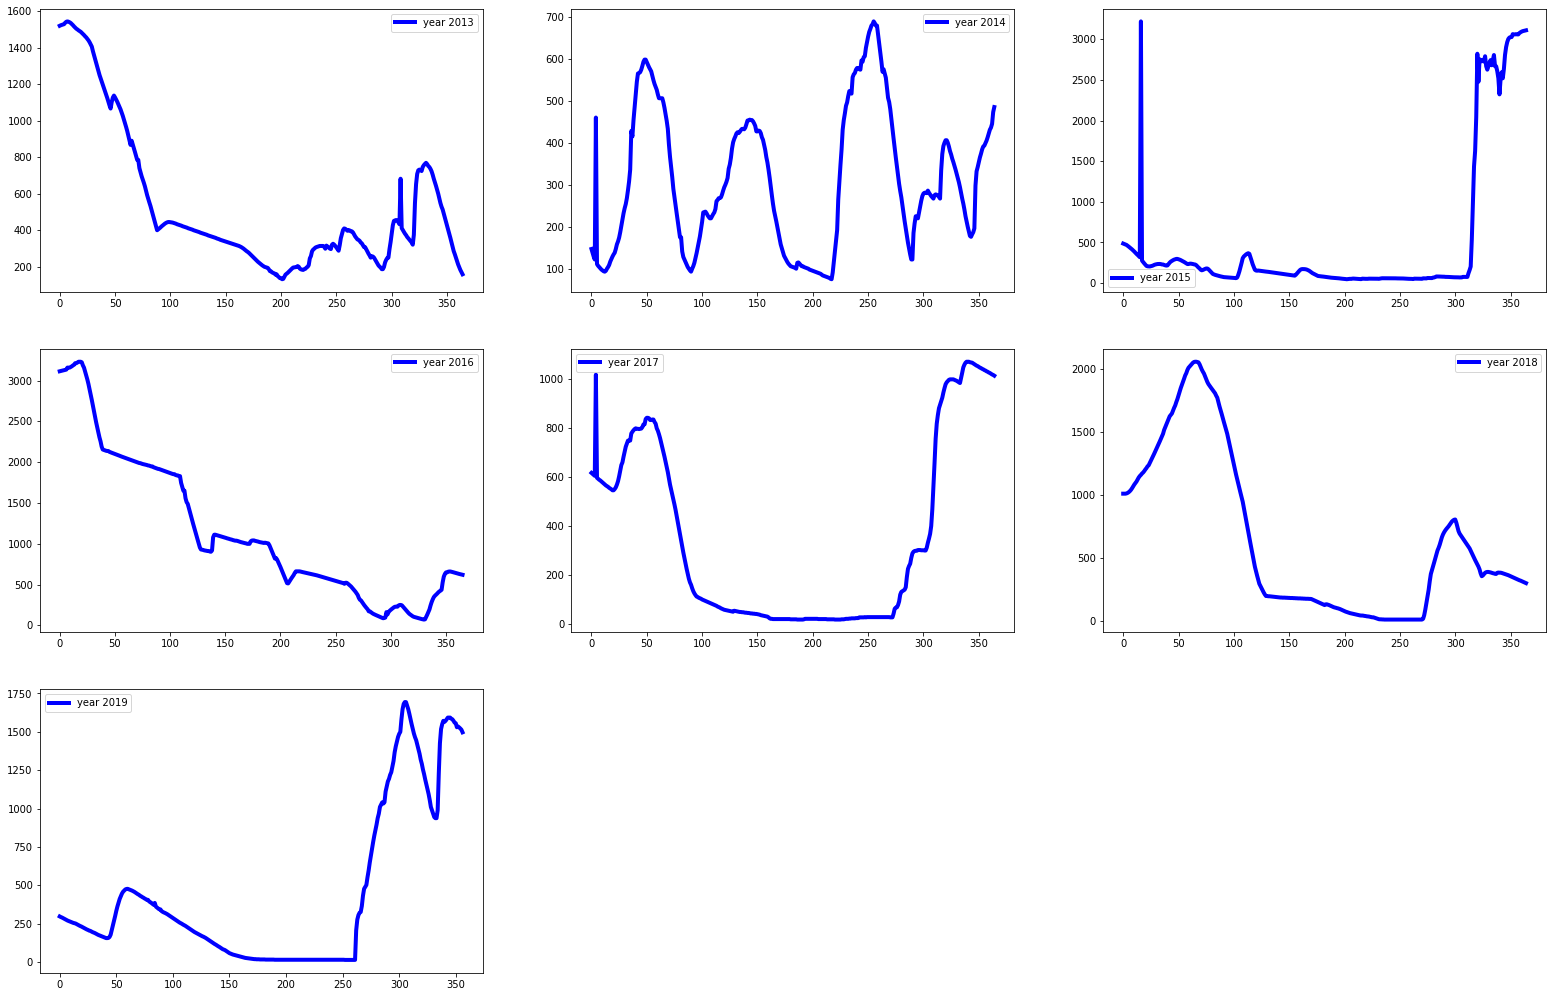

In [32]:
#POONDI 2013-2019
plt.figure(figsize=(27,24))
plt.subplot(431)
plt.plot(list(range(reservoir_levels_2013.shape[0])),reservoir_levels_2013['POONDI'],'b',label = "year 2013",linewidth = 4)
plt.legend()
plt.subplot(432)
plt.plot(list(range(reservoir_levels_2014.shape[0])),reservoir_levels_2014['POONDI'],'b',label = "year 2014",linewidth = 4)
plt.legend()
plt.subplot(433)
plt.plot(list(range(reservoir_levels_2015.shape[0])),reservoir_levels_2015['POONDI'],'b',label = "year 2015",linewidth = 4)
plt.legend()
plt.subplot(434)
plt.plot(list(range(reservoir_levels_2016.shape[0])),reservoir_levels_2016['POONDI'],'b',label = "year 2016",linewidth = 4)
plt.legend()
plt.subplot(435)
plt.plot(list(range(reservoir_levels_2017.shape[0])),reservoir_levels_2017['POONDI'],'b',label = "year 2017",linewidth = 4)
plt.legend()
plt.subplot(436)
plt.plot(list(range(reservoir_levels_2018.shape[0])),reservoir_levels_2018['POONDI'],'b',label = "year 2018",linewidth = 4)
plt.legend()
plt.subplot(437)
plt.plot(list(range(reservoir_levels_2019.shape[0])),reservoir_levels_2019['POONDI'],'b',label = "year 2019",linewidth = 4)
plt.legend()

Text(0.5, 1.0, 'Comparision of reservoir levels of all the Reservoirs in year 2004')

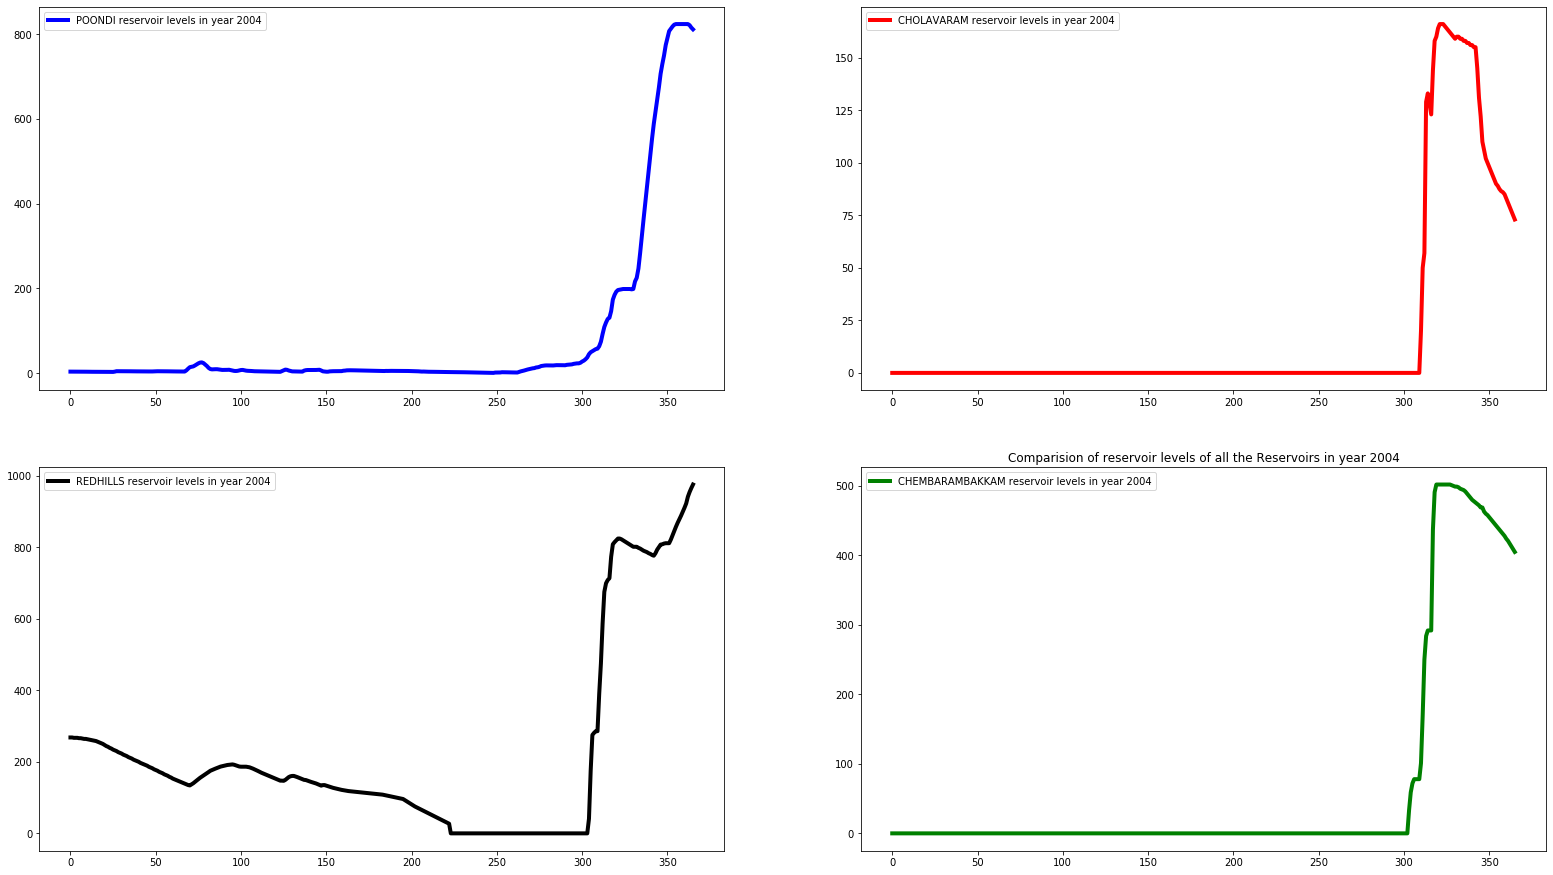

In [33]:
#2004
plt.figure(figsize=(27,24))
plt.subplot(321)
plt.plot(list(range(reservoir_levels_2004.shape[0])),reservoir_levels_2004['POONDI'],'b',label = "POONDI reservoir levels in year 2004",linewidth = 4)
plt.legend()

plt.subplot(322)
plt.plot(list(range(reservoir_levels_2004.shape[0])),reservoir_levels_2004['CHOLAVARAM'],'r',label = "CHOLAVARAM reservoir levels in year 2004",linewidth = 4)
plt.legend()

plt.subplot(323)
plt.plot(list(range(reservoir_levels_2004.shape[0])),reservoir_levels_2004['REDHILLS'],'k',label = "REDHILLS reservoir levels in year 2004",linewidth = 4)
plt.legend()

plt.subplot(324)
plt.plot(list(range(reservoir_levels_2004.shape[0])),reservoir_levels_2004['CHEMBARAMBAKKAM'],'g',label = "CHEMBARAMBAKKAM reservoir levels in year 2004",linewidth = 4)
plt.legend()
plt.title("Comparision of reservoir levels of all the Reservoirs in year 2004")

Text(0.5, 1.0, 'Comparision of reservoir levels of all the Reservoirs in year 2005')

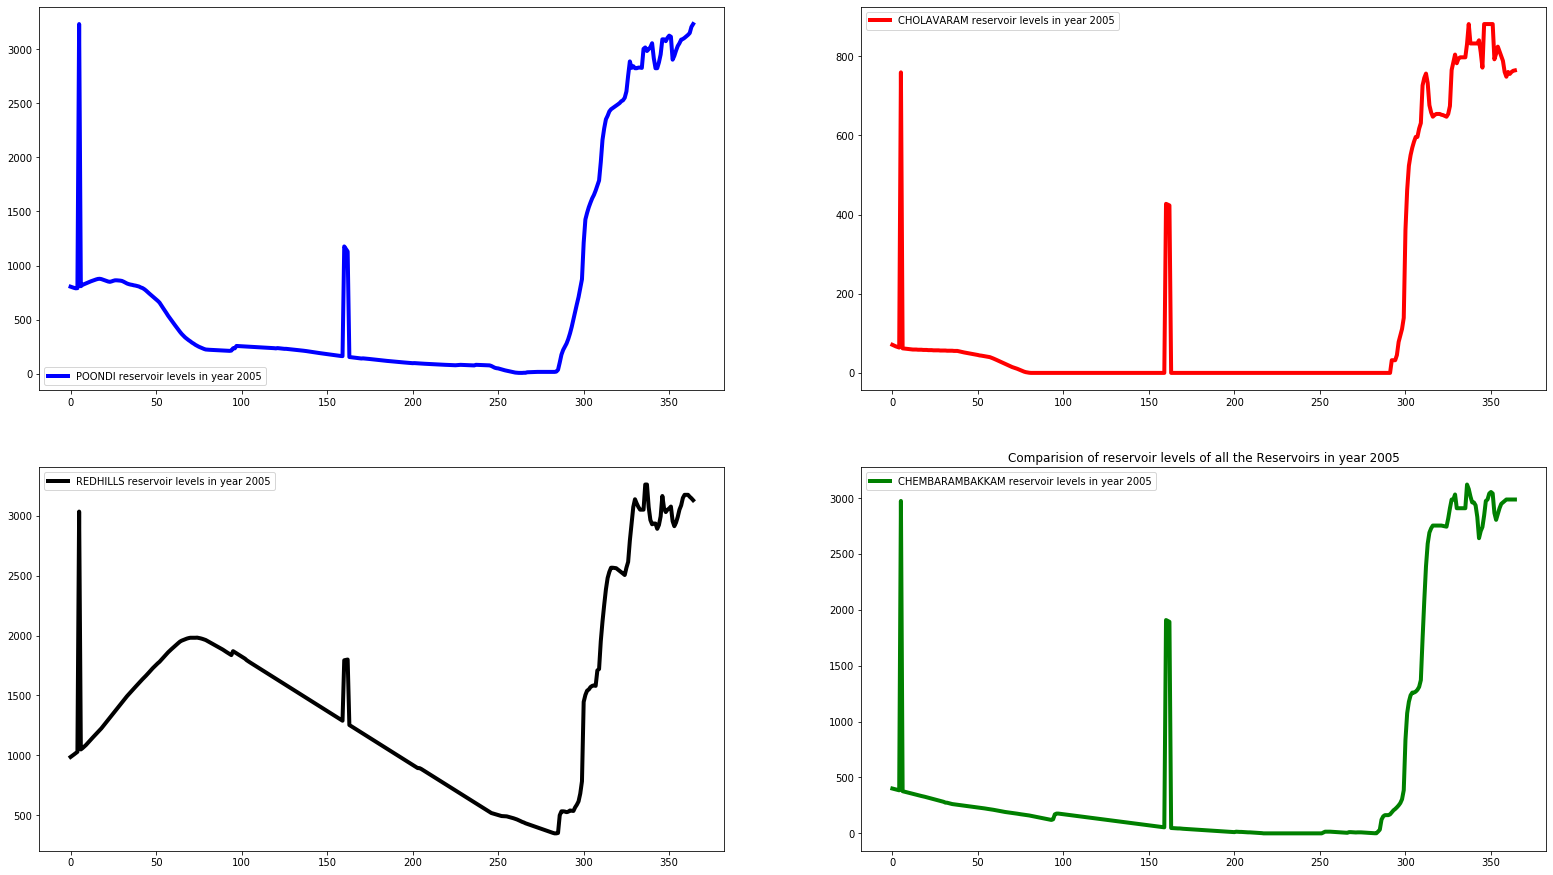

In [34]:
#2005
plt.figure(figsize=(27,24))

plt.subplot(321)
plt.plot(list(range(reservoir_levels_2005.shape[0])),reservoir_levels_2005['POONDI'],'b',label = "POONDI reservoir levels in year 2005",linewidth = 4)
plt.legend()
plt.subplot(322)
plt.plot(list(range(reservoir_levels_2005.shape[0])),reservoir_levels_2005['CHOLAVARAM'],'r',label = "CHOLAVARAM reservoir levels in year 2005",linewidth = 4)
plt.legend()
plt.subplot(323)
plt.plot(list(range(reservoir_levels_2005.shape[0])),reservoir_levels_2005['REDHILLS'],'k',label = "REDHILLS reservoir levels in year 2005",linewidth = 4)
plt.legend()
plt.subplot(324)
plt.plot(list(range(reservoir_levels_2005.shape[0])),reservoir_levels_2005['CHEMBARAMBAKKAM'],'g',label = "CHEMBARAMBAKKAM reservoir levels in year 2005",linewidth = 4)
plt.legend()

plt.title("Comparision of reservoir levels of all the Reservoirs in year 2005")


Text(0.5, 1.0, 'Month Wise Mean Distribution of reservoirs levels in 2004')

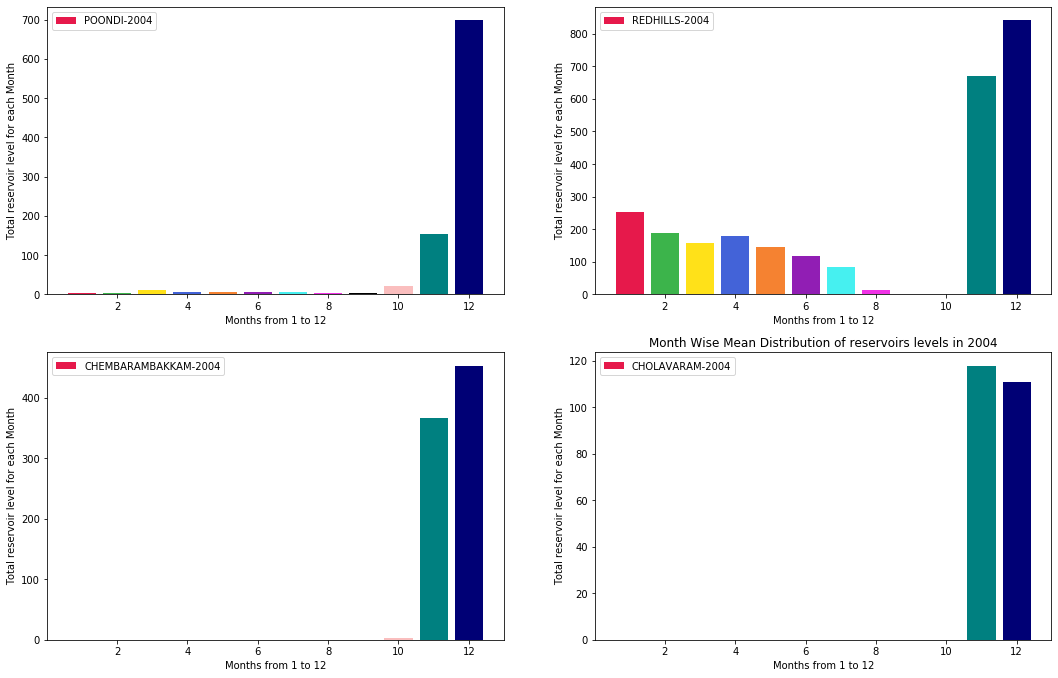

In [35]:
reservoir_levels_grouped_mean_2004 = reservoir_levels_2004.groupby('month').mean()
#Custom colors
my_colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
             '#911eb4', '#46f0f0', '#f032e6', '#000000', '#fabebe', '#008080', '#000075']
# 2004
plt.figure(figsize=(18,18))
plt.subplot(321)
plt.bar(list(range(1,13)),reservoir_levels_grouped_mean_2004['POONDI'], label = "POONDI-2004", color = my_colors)
plt.xlabel("Months from 1 to 12")
plt.ylabel("Total reservoir level for each Month")
plt.legend()
plt.subplot(322)
plt.bar(list(range(1,13)),reservoir_levels_grouped_mean_2004['REDHILLS'], label = "REDHILLS-2004", color = my_colors)
plt.xlabel("Months from 1 to 12")
plt.ylabel("Total reservoir level for each Month")
plt.legend()
plt.subplot(323)
plt.bar(list(range(1,13)),reservoir_levels_grouped_mean_2004['CHEMBARAMBAKKAM'], label = "CHEMBARAMBAKKAM-2004", color = my_colors)
plt.xlabel("Months from 1 to 12")
plt.ylabel("Total reservoir level for each Month")
plt.legend()
plt.subplot(324)
plt.bar(list(range(1,13)),reservoir_levels_grouped_mean_2004['CHOLAVARAM'], label = "CHOLAVARAM-2004", color = my_colors)
plt.xlabel("Months from 1 to 12")
plt.ylabel("Total reservoir level for each Month")
plt.legend()
plt.title("Month Wise Mean Distribution of reservoirs levels in 2004")

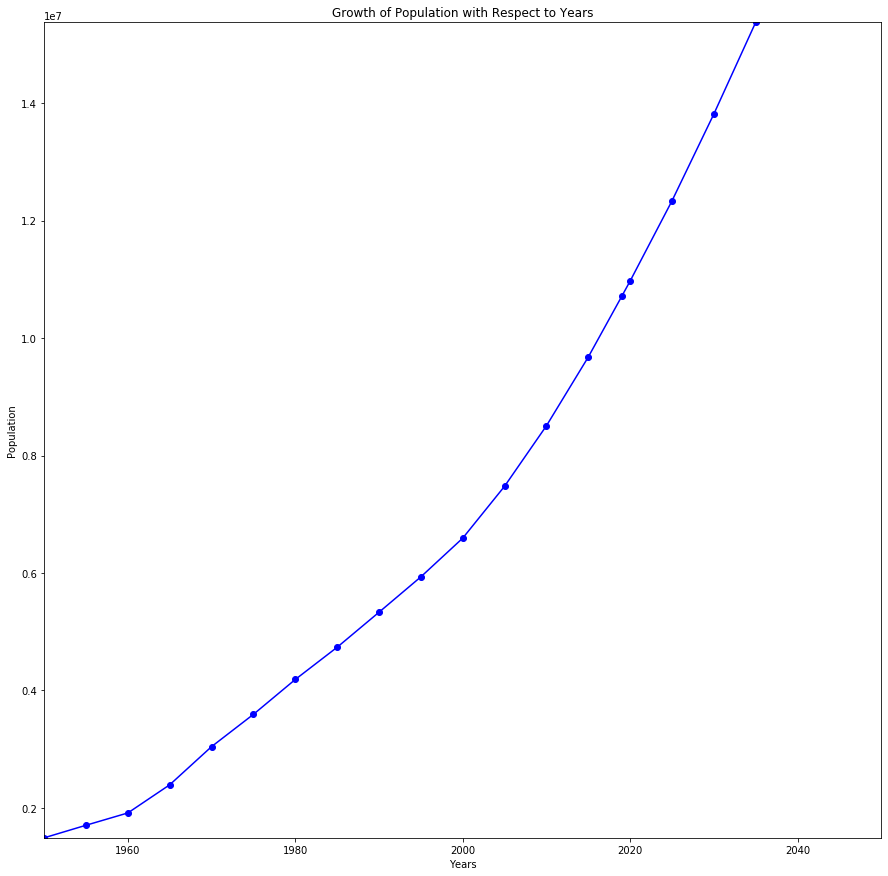

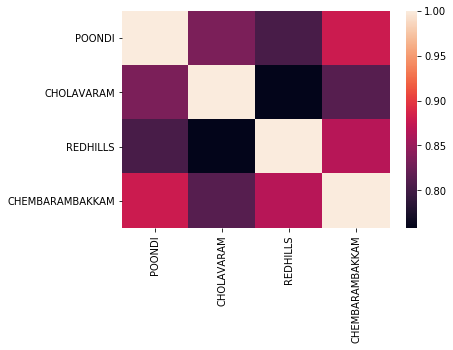

In [59]:
#plotting the growth
plt.figure(figsize=(15,15))
plt.plot(chennai_population['Year'],chennai_population['Population'],'-ob')
plt.xlim(1950,2050)
plt.ylim(1491293,15376000)
plt.xlabel("Years")
plt.ylabel("Population")
plt.title("Growth of Population with Respect to Years")
plt.show()

reservoir_data_corr_matrix = reservoir_levels.loc[:,'POONDI':'CHEMBARAMBAKKAM'].corr()
sns.heatmap(reservoir_data_corr_matrix)

# Prediction of water Level in 4th Dam

In [91]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [118]:
res_levels = pd.read_csv('chennai_reservoir.csv')
res_levels = res_levels.drop(['Date'],axis=1)
dataset = res_levels.to_numpy()

In [119]:
res_levels

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,37.4,0.0,0.00,33.0
1,45.0,0.0,40.77,59.0
2,49.6,0.0,175.00,72.0
3,52.0,0.0,275.00,78.0
4,54.4,0.0,281.00,78.0
...,...,...,...,...
5528,1535.0,139.0,2318.00,1397.0
5529,1529.0,131.0,2335.00,1435.0
5530,1522.0,123.0,2351.00,1473.0
5531,1514.0,115.0,2369.00,1510.0


In [120]:
# Shuffle dataset
np.random.shuffle(dataset)

In [121]:
scaler = StandardScaler()
dataset = scaler.fit_transform(dataset)

In [122]:
dataset.shape

(5533, 4)

In [123]:
# Separate features and targets
X = dataset[:, 0:3]
y = dataset[:, 3]

In [124]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

In [125]:
input_shape

(3,)

In [126]:
#Sequential Model with 3 layers (16,8 and 1 unit respectively)
model = Sequential()
model.add(Dense(16, input_shape=input_shape, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

In [131]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [132]:
output = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=10, batch_size=64)

Train on 4149 samples, validate on 1384 samples
Epoch 1/10
4149/4149 [==============================] - 1s 175us/step - loss: 0.1314 - val_loss: 0.1363
Epoch 2/10
4149/4149 [==============================] - 0s 43us/step - loss: 0.1319 - val_loss: 0.1337
Epoch 3/10
4149/4149 [==============================] - 0s 44us/step - loss: 0.1292 - val_loss: 0.1328
Epoch 4/10
4149/4149 [==============================] - 0s 41us/step - loss: 0.1284 - val_loss: 0.1310
Epoch 5/10
4149/4149 [==============================] - 0s 42us/step - loss: 0.1276 - val_loss: 0.1310
Epoch 6/10
4149/4149 [==============================] - 0s 42us/step - loss: 0.1263 - val_loss: 0.1294
Epoch 7/10
4149/4149 [==============================] - 0s 44us/step - loss: 0.1258 - val_loss: 0.1292
Epoch 8/10
4149/4149 [==============================] - 0s 42us/step - loss: 0.1245 - val_loss: 0.1274
Epoch 9/10
4149/4149 [==============================] - 0s 50us/step - loss: 0.1247 - val_loss: 0.1264
Epoch 10/10
4149/4149 [=

In [129]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [130]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 100.0
